In [1]:
'''
Created on June 21, 2018

@author Alex Yu
@version July 1, 2018
'''
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import linregress   

pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('fivethirtyeight')

# Exp_49

In [2]:
gen_info49 = pd.read_table('LifeSpanCellFeatures/exp49_changhui.txt', sep='\t')
gen_info49.sort_values(by=['pos', 'label', 'time'], ascending=True, inplace=True)

gen_info49['state_int'] = 0
gen_info49['state_int'][gen_info49['state']=='S'] = 1
gen_info49.drop(['x', 'y', 'auto_type', 'final_state', 'is_fresh'], axis=1, inplace=True)
gen_info49['gen'] = gen_info49.groupby(by=['pos', 'label']).state_int.cumsum() + 1
gen_info49['id'] = 'P' + gen_info49['pos'].astype(str) + 'L' + gen_info49['label'].astype(str)
gen_info49['min'] = 30 * gen_info49['time']
gen_info49['area_change'] = gen_info49.groupby(by=['pos', 'label'])['area'].apply(lambda x: x.div(x.iloc[0])).multiply(100)

mean_data49 = gen_info49.groupby(by='gen')['area_change'].mean().reset_index()
data_vals49 = gen_info49.pivot_table(index = 'id', columns = 'gen', values = 'area_change')
std_vals49 = data_vals49.std(axis=0)
std_vals49.reset_index(drop=True, inplace=True)

lifespans49 = gen_info49.groupby(by=['pos', 'label'])['min'].max().reset_index().sort_values(by=['min'], ascending=False)
lifespans49.rename(columns={'min':'lifespan'}, inplace=True)
#lifespans49

(1, 41)

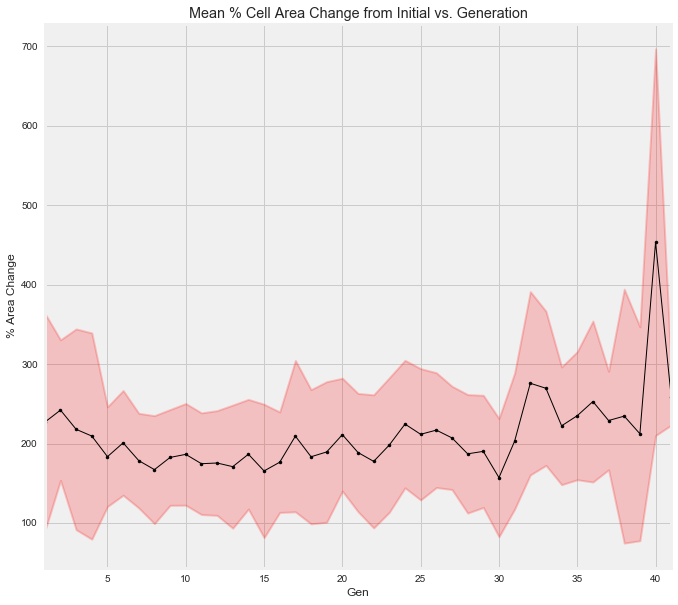

In [3]:
plt.figure(figsize=(10, 10))
plt.title('Mean % Cell Area Change from Initial vs. Generation')
plt.xlabel('Gen')
plt.ylabel('% Area Change')
plt.plot(mean_data49['gen'], mean_data49['area_change'], marker='.', linewidth=1, color='black')
plt.fill_between(mean_data49['gen'], mean_data49['area_change'] + std_vals49, mean_data49['area_change'] - std_vals49, color='red', linewidth = 2, alpha=.2)

plt.grid(True)

plt.xlim(xmin=1, xmax=41)

(0, 40.5)

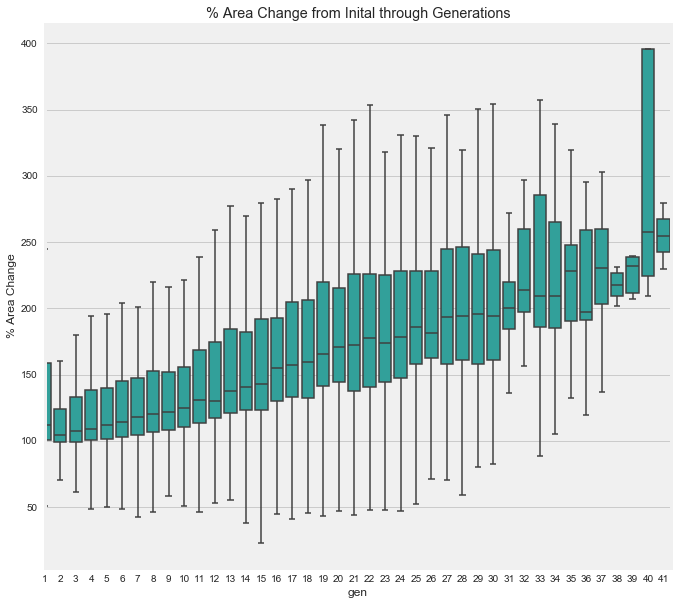

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=data_vals49, color='lightseagreen', showfliers=False, linewidth = 1.5)
ax.set_title('% Area Change from Inital through Generations')
ax.set_ylabel('% Area Change')
ax.set_xlim(0, 40.5)

## Long-lived cells

In [87]:
long_lived49 = lifespans49[lifespans49['lifespan'] >= 8640]
#long_lived49

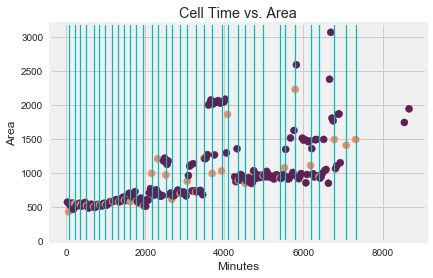

In [12]:
index = (gen_info49['pos']==575) & (gen_info49['label']==34)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


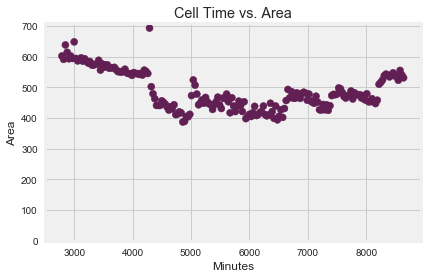

In [13]:
index = (gen_info49['pos']==573) & (gen_info49['label']==18)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)
    

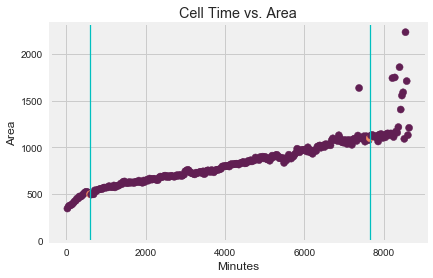

In [14]:
index = (gen_info49['pos']==505) & (gen_info49['label']==5)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


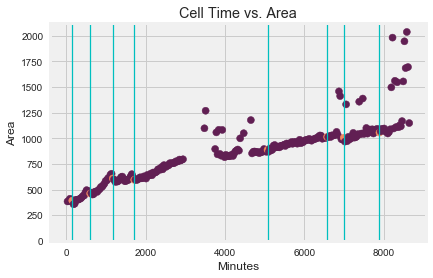

In [15]:
index = (gen_info49['pos']==518) & (gen_info49['label']==12)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


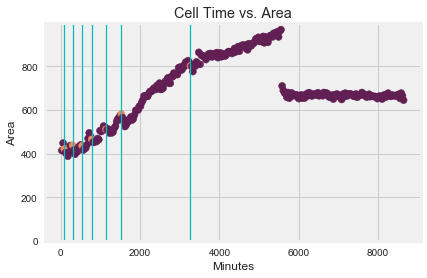

In [16]:
index = (gen_info49['pos']==517) & (gen_info49['label']==2)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


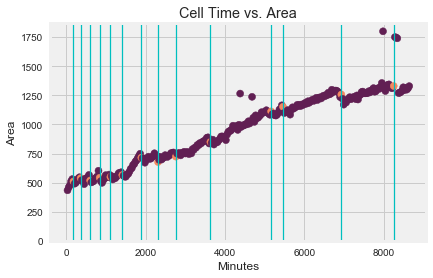

In [17]:
index = (gen_info49['pos']==511) & (gen_info49['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


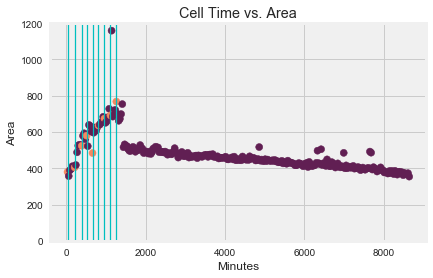

In [18]:
index = (gen_info49['pos']==499) & (gen_info49['label']==5)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


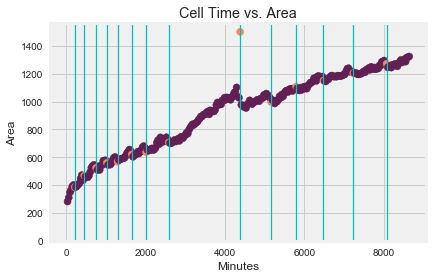

In [19]:
index = (gen_info49['pos']==559) & (gen_info49['label']==2)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


## Short-lived cells

In [88]:
short_lived49 = lifespans49[(lifespans49['lifespan'] <= 5000) & (lifespans49['lifespan'] >= 2000)]
#short_lived49

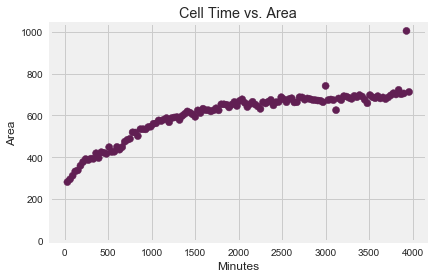

In [20]:
index = (gen_info49['pos']==565) & (gen_info49['label']==7)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


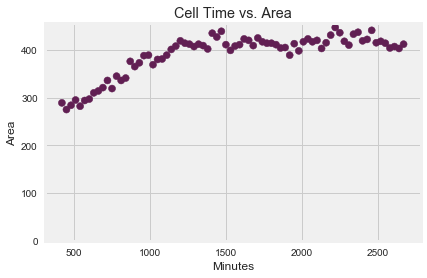

In [21]:
index = (gen_info49['pos']==485) & (gen_info49['label']==44)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)
    

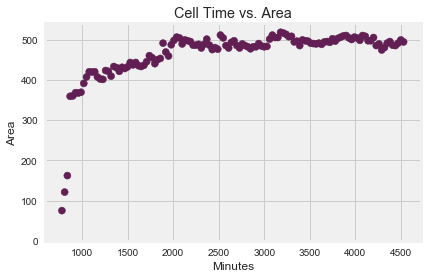

In [22]:
index = (gen_info49['pos']==559) & (gen_info49['label']==24)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)
    

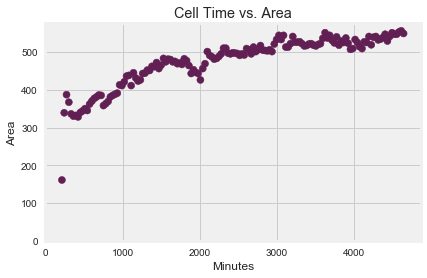

In [23]:
index = (gen_info49['pos']==530) & (gen_info49['label']==14)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)
    

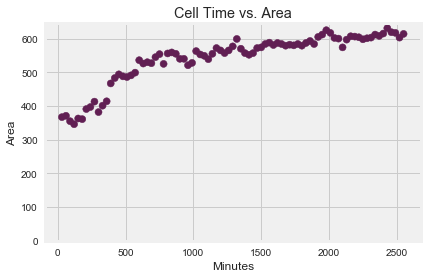

In [24]:
index = (gen_info49['pos']==445) & (gen_info49['label']==42)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


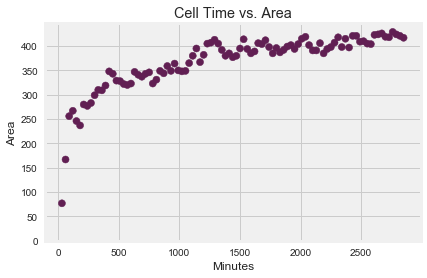

In [25]:
index = (gen_info49['pos']==507) & (gen_info49['label']==26)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info49[index]['min'], gen_info49[index]['area'], marker='o', c=gen_info49[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)

budding_events = gen_info49[index & (gen_info49['state_int']==1)]['min']
for x in budding_events:
    plt.axvline(x, c='c', linewidth = 1.25)


## Comparing area growth between long-lived and short-lived cells

(366.55490017302594, 1000)

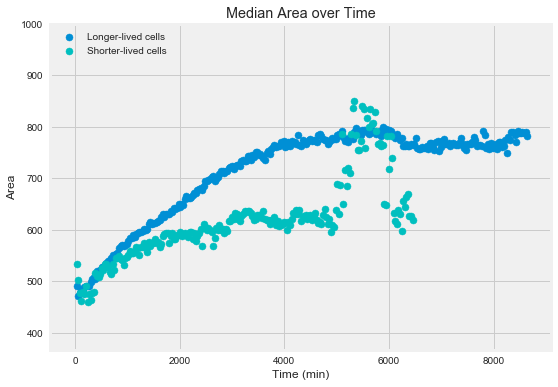

In [26]:
lifespans49_long = gen_info49.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() >= 6500)
med_lifespans49_long = lifespans49_long.groupby(by='min')['area'].median().reset_index()

lifespans49_short = gen_info49.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() < 6500)
med_lifespans49_short = lifespans49_short.groupby(by='min')['area'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(med_lifespans49_long['min'], med_lifespans49_long['area'], marker='o', label='Longer-lived cells')
plt.scatter(med_lifespans49_short['min'], med_lifespans49_short['area'], marker='o', c='c', label='Shorter-lived cells')
plt.xlabel('Time (min)')
plt.ylabel('Area')
plt.legend(loc = 'upper left')
plt.title('Median Area over Time')

plt.ylim(ymax=1000)

## Num of Divisions vs Lifespan

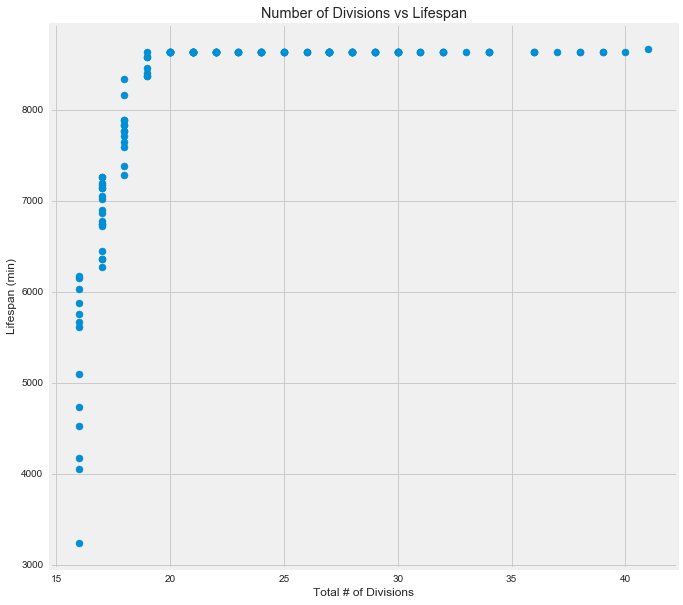

In [27]:
div_count49 = gen_info49.groupby(by=['pos', 'label'])['state_int'].sum().reset_index().sort_values(by=['state_int'], ascending=False)
div_count49.rename(columns={'state_int':'divisions'}, inplace=True)

plt.figure(figsize=(10, 10))
plt.xlabel('Total # of Divisions')
plt.ylabel('Lifespan (min)')
plt.title('Number of Divisions vs Lifespan')
plt.scatter(div_count49['divisions'][div_count49['divisions'] > 15], lifespans49['lifespan'][div_count49['divisions'] > 15], marker='o')


## When Most Divisions Occur vs. Lifespan

In [30]:
total_gens49 = gen_info49.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
total_gens49.rename(columns={'state_int':'gens'}, inplace=True)

first_half_gens49 = gen_info49.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] <= x['min'].max()/2])
first_half_gens49.drop(['pos', 'label'], axis=1, inplace=True)
first_half_gens49.reset_index(inplace=True)
first_half_gens49 = first_half_gens49.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
first_half_gens49 = first_half_gens49.rename(columns={'state_int':'first_half_gens49'})
first_half_gens49 = pd.merge(first_half_gens49, total_gens49, on=['pos', 'label'], how='outer')
first_half_gens49['first half/total'] = first_half_gens49['first_half_gens49'] / first_half_gens49['gens']
first_half_gens49 = pd.merge(first_half_gens49, lifespans49, on=['pos', 'label'], how='outer')
first_half_gens49 = first_half_gens49.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

final_area_change49 = gen_info49.groupby(by=['pos', 'label'])['area_change'].last().reset_index()

In [31]:
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=final_area_change['area_change'].min(), vmax=1100)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.scatter(first_half_gens49['first half/total'], first_half_gens49['lifespan'], c=cmap(norm(final_area_change49['area_change'].values)))
plt.xlabel('Divisions in 1st half / total')
plt.ylabel('Lifespan (min)')
plt.title('Fraction of Divisions in 1st Half vs. Lifespan')
plt.grid(True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Final Area of Cell', rotation=90)


NameError: name 'final_area_change' is not defined

## Initial cell size vs. Lifespan

In [6]:
init_data49 = gen_info49.groupby(by=['pos', 'label']).first()
init_data49.reset_index(inplace=True)

init_data49 = pd.merge(init_data49, lifespans49, on=['pos', 'label'], how='outer')
init_data49.rename(columns={'area':'init_area'}, inplace=True)
init_data49['final_area'] = gen_info49.groupby(by=['pos', 'label'])['area'].last().reset_index()['area']

mean_init_data49 = init_data49.groupby(pd.cut(init_data49['init_area'], np.arange(0, 3500, 100)))['init_area', 'lifespan', 'final_area'].mean()
mean_init_data49.dropna(axis=0, inplace=True)
len(mean_init_data49)

19

Text(0.5,1,'Initial Cell Area vs Mean Lifespan')

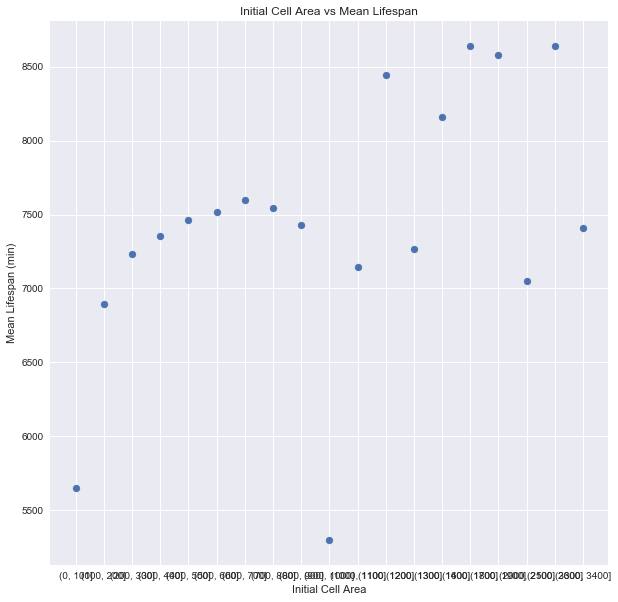

In [7]:

plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(0, 3500, 19), mean_init_data49.lifespan)
plt.xticks(np.linspace(0, 3500, 19), mean_init_data49.index)
#plt.ylim(ymin=0)
plt.xlabel('Initial Cell Area')
plt.ylabel('Mean Lifespan (min)')
plt.title('Initial Cell Area vs Mean Lifespan')
 


Text(0.5,1,'Initial Cell Area vs. Lifespan')

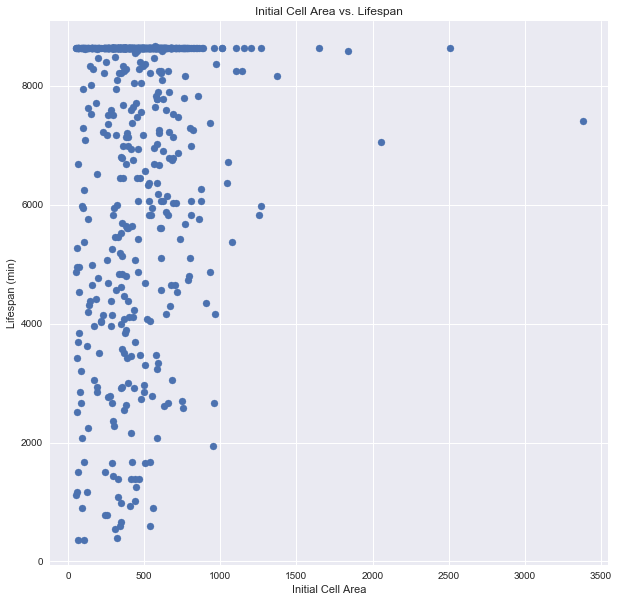

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plt.scatter(init_data49['init_area'], init_data49['lifespan'])
plt.xlabel('Initial Cell Area')
plt.ylabel('Lifespan (min)')
plt.title('Initial Cell Area vs. Lifespan')


# Exp 56

In [8]:
gen_info56 = pd.read_table('LifeSpanCellFeatures/exp56_changhui.txt', sep='\t')
gen_info56.sort_values(by=['pos', 'label', 'time'], ascending=True, inplace=True)

gen_info56['state_int'] = 0
gen_info56['state_int'][gen_info56['state']=='S'] = 1
gen_info56.drop(['x', 'y', 'auto_type', 'final_state', 'is_fresh'], axis=1, inplace=True)
gen_info56['gen'] = gen_info56.groupby(by=['pos', 'label']).state_int.cumsum() + 1
gen_info56['id'] = 'P' + gen_info56['pos'].astype(str) + 'L' + gen_info56['label'].astype(str)
gen_info56['min'] = 30 * gen_info56['time']

gen_info56['area_change'] = gen_info56.groupby(by=['pos', 'label'])['area'].apply(lambda x: x.div(x.iloc[0])).multiply(100)
mean_data56 = gen_info56.groupby(by='gen')['area_change'].mean().reset_index()
data_vals56 = gen_info56.pivot_table(index = 'id', columns = 'gen', values = 'area_change')
std_vals56 = data_vals56.std(axis=0)
std_vals56.reset_index(drop=True, inplace=True)

lifespans56 = gen_info56.groupby(by=['pos', 'label'])['min'].max().reset_index().sort_values(by=['min'], ascending=False)
lifespans56.rename(columns={'min':'lifespan'}, inplace=True)
#lifespans56

## Generating heatmap

Text(0.5,1,'Size of Cell over Generation')

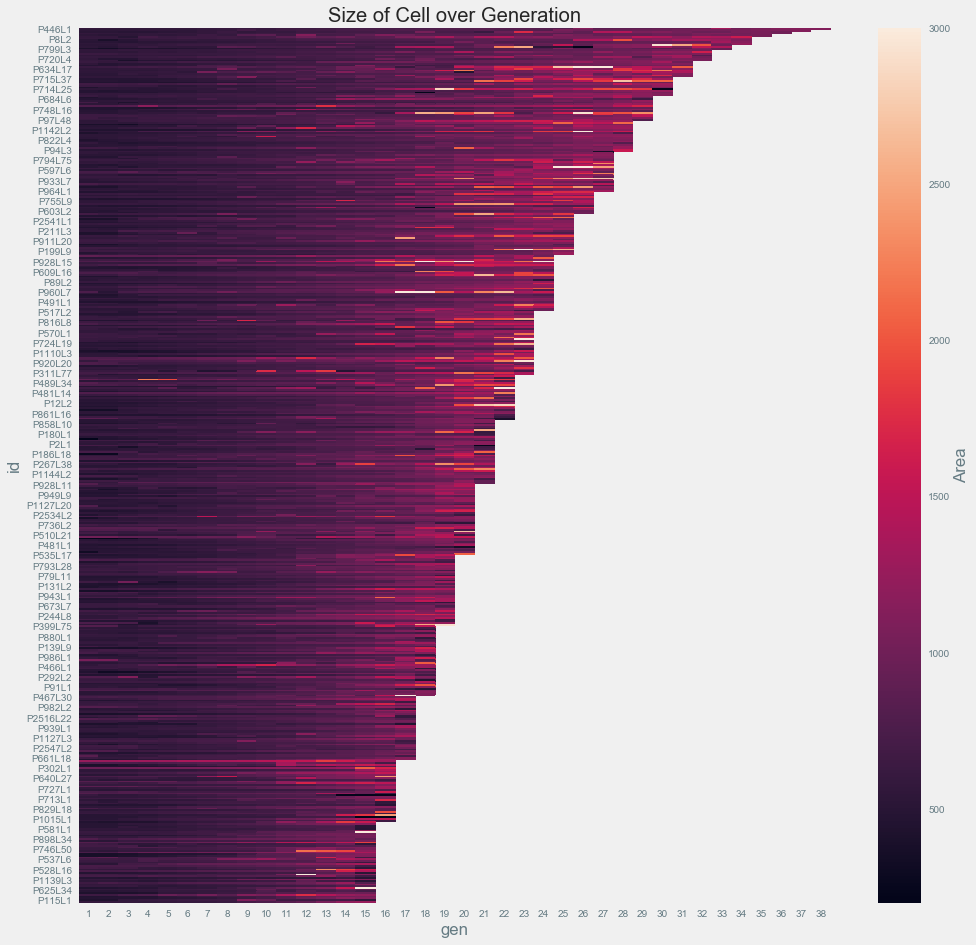

In [108]:
heatmap_set56 = gen_info56.pivot_table(index = 'id', columns = 'gen', values = 'area')
heatmap_set56[1].fillna(heatmap_set56[2], inplace = True)
heatmap_set56['full_count'] = heatmap_set56.apply(lambda x: x.count(), axis = 1)
heatmap_set56.sort_values('full_count', inplace = True, ascending = False)

#long_lived = heatmap_set.full_count >= 35
#short_lived = (heatmap_set.full_count <= 20) & (heatmap_set.full_count >= 15)

filter_gen56 = heatmap_set56.full_count >= 15

heatmap_set56 = heatmap_set56[filter_gen56]
heatmap_set56.drop('full_count', axis = 1, inplace = True)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(heatmap_set56, vmin = 200, vmax = 3000, cbar_kws={'label': 'Area'}).set_title('Size of Cell over Generation')

(0, 36.5)

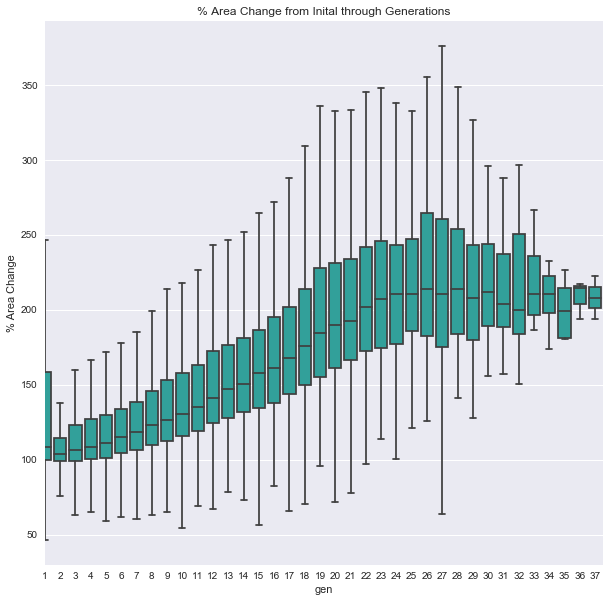

In [209]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=data_vals56, color='lightseagreen', showfliers=False)
ax.set_title('% Area Change from Inital through Generations')
ax.set_ylabel('% Area Change')
ax.set_xlim(0, 36.5)

## Long-lived cells

In [20]:
long_lived56 = lifespans56[lifespans56['lifespan'] >= 4000]
#long_lived56

(0, 3586.217706033848)

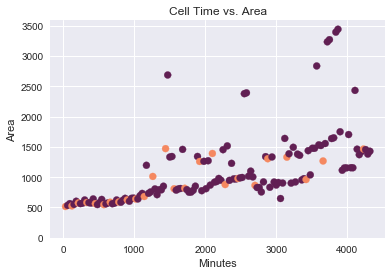

In [212]:
index = (gen_info56['pos']==755) & (gen_info56['label']==9)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 461.7177060338484)

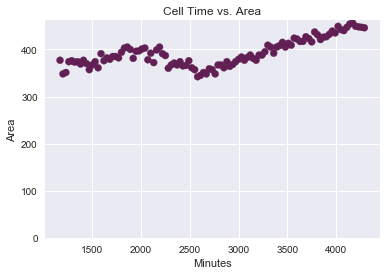

In [213]:
index = (gen_info56['pos']==717) & (gen_info56['label']==4)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


index = (gen_info56['pos']==722) & (gen_info56['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1773.7677060338485)

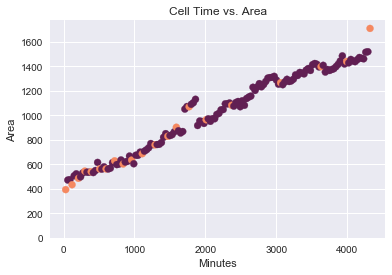

In [215]:
index = (gen_info56['pos']==376) & (gen_info56['label']==9)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1812.9677060338483)

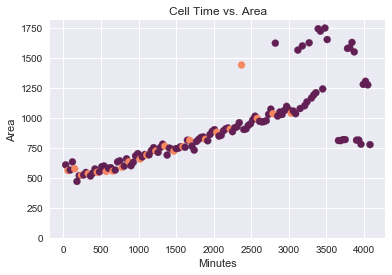

In [216]:
index = (gen_info56['pos']==581) & (gen_info56['label']==3)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 2111.6677060338484)

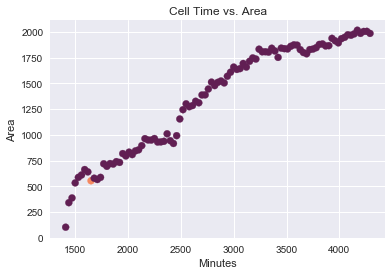

In [217]:
index = (gen_info56['pos']==12) & (gen_info56['label']==8)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info56[index]['min'], gen_info56[index]['area'], marker='o', c=gen_info56[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


## Comparing area growth between long-lived and short-lived cells

Text(0.5,1,'Median Area over Time')

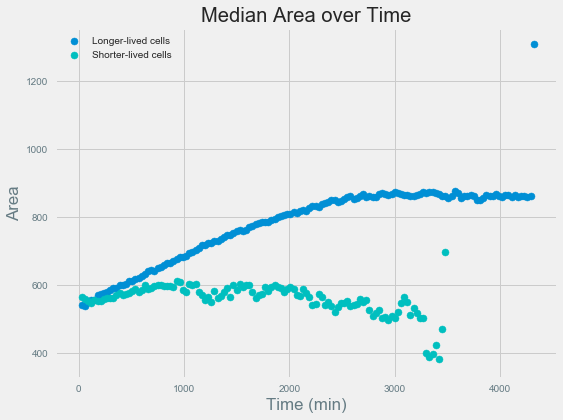

In [95]:
lifespans56_long = gen_info56.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() >= 3500)
med_lifespans56_long = lifespans56_long.groupby(by='min')['area'].median().reset_index()

lifespans56_short = gen_info56.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() < 3500)
med_lifespans56_short = lifespans56_short.groupby(by='min')['area'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(med_lifespans56_long['min'], med_lifespans56_long['area'], marker='o', label='Longer-lived cells')
plt.scatter(med_lifespans56_short['min'], med_lifespans56_short['area'], marker='o', c='c', label='Shorter-lived cells')
plt.xlabel('Time (min)')
plt.ylabel('Area')
plt.legend(loc = 'upper left')
plt.title('Median Area over Time')

## Num of Divisions vs Lifespan

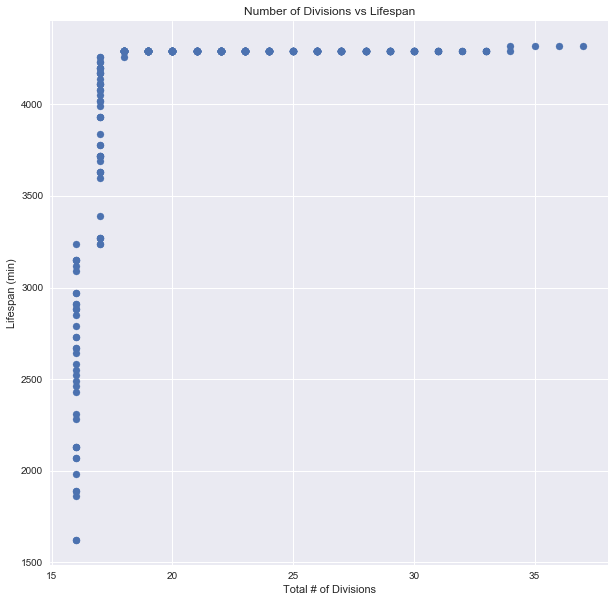

In [219]:
div_count56 = gen_info56.groupby(by=['pos', 'label'])['state_int'].sum().reset_index().sort_values(by=['state_int'], ascending=False)
div_count56.rename(columns={'state_int':'divisions'}, inplace=True)

plt.figure(figsize=(10, 10))
plt.xlabel('Total # of Divisions')
plt.ylabel('Lifespan (min)')
plt.title('Number of Divisions vs Lifespan')
plt.scatter(div_count56['divisions'][div_count56['divisions'] > 15], lifespans56['lifespan'][div_count56['divisions'] > 15], marker='o')


## When Most Divisions Occur vs. Lifespan

In [78]:
total_gens56 = gen_info56.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
total_gens56.rename(columns={'state_int':'gens'}, inplace=True)

first_half_gens56 = gen_info56.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] <= x['min'].max()/2])
first_half_gens56.drop(['pos', 'label'], axis=1, inplace=True)
first_half_gens56.reset_index(inplace=True)
first_half_gens56 = first_half_gens56.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
first_half_gens56 = first_half_gens56.rename(columns={'state_int':'first_half_gens56'})
first_half_gens56 = pd.merge(first_half_gens56, total_gens56, on=['pos', 'label'], how='outer')
first_half_gens56['first half/total'] = first_half_gens56['first_half_gens56'] / first_half_gens56['gens']
first_half_gens56 = pd.merge(first_half_gens56, lifespans56, on=['pos', 'label'], how='outer')
first_half_gens56 = first_half_gens56.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

final_area_change56 = gen_info56.groupby(by=['pos', 'label'])['area_change'].last().reset_index()

Text(0,0.5,'Final Area of Cell')

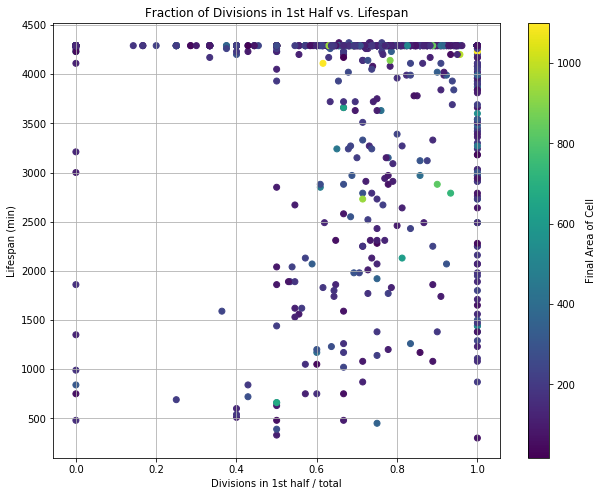

In [79]:
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=final_area_change['area_change'].min(), vmax=1100)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.scatter(first_half_gens56['first half/total'], first_half_gens56['lifespan'], c=cmap(norm(final_area_change56['area_change'].values)))
plt.xlabel('Divisions in 1st half / total')
plt.ylabel('Lifespan (min)')
plt.title('Fraction of Divisions in 1st Half vs. Lifespan')
plt.grid(True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Final Area of Cell', rotation=90)


## Linear Regression on 2nd Half of Lifespan

In [71]:
sec_half_gens56 = gen_info56.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] >= x['min'].max()/2])
sec_half_gens56.drop(['pos', 'label', 'time', 'state', 'id'], axis=1, inplace=True)
sec_half_gens56.reset_index(inplace=True)

lin_data56 = (sec_half_gens56.groupby(by=['pos', 'label']).apply(lambda x: pd.Series(linregress(x['min'], x['area'])))
               .rename(columns={
                        0: 'slope',
                        1: 'intercept',
                        2: 'rvalue',
                        3: 'pvalue',
                        4: 'stderr'
                      })
       )

lin_data56 = pd.merge(lin_data56, lifespans56, on=['pos', 'label'], how='outer')
lin_data56.dropna(axis=0, inplace=True)

Text(0.5,1,'Slope vs. Lifespan')

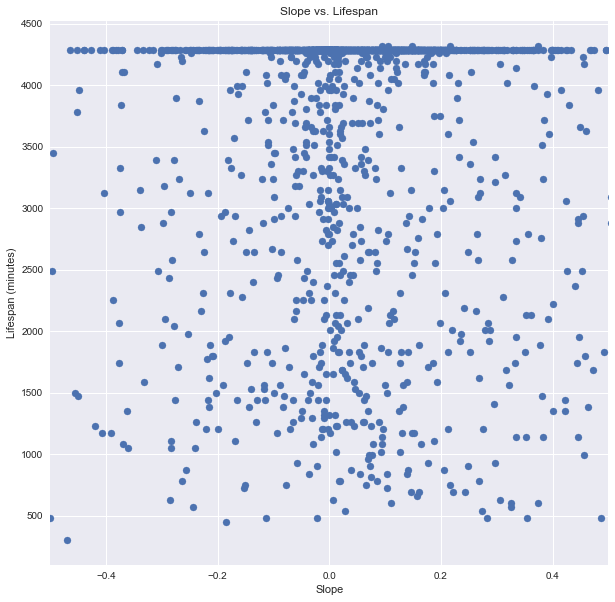

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(lin_data56['slope'], lin_data56['lifespan'])
plt.xlim(xmin=-.5, xmax=.5)
plt.ylabel('Lifespan (minutes)')
plt.xlabel('Slope')
plt.title('Slope vs. Lifespan')

Text(0,0.5,'Slope')

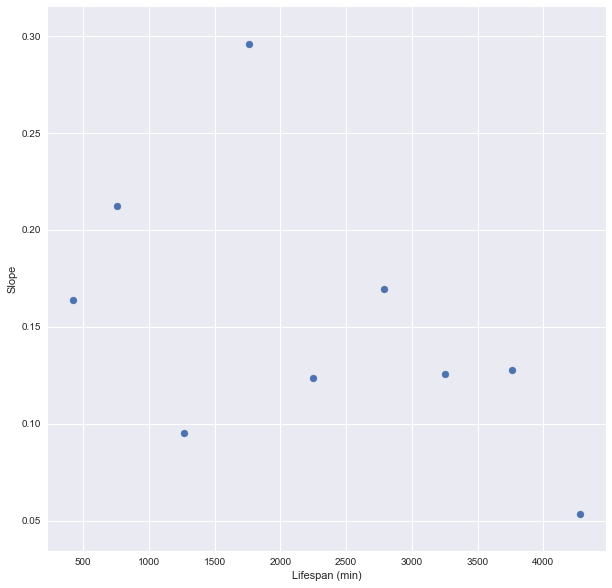

In [74]:
mean_lin_data = lin_data56.groupby(pd.cut(lin_data56['lifespan'], np.arange(0, 4600, 500))).mean()
#lin_table56 = lin_data56.pivot_table(index = 'id', columns = 'lifespan', values = 'slope')
#mean_lin_data

plt.figure(figsize=(10, 10))
plt.scatter(mean_lin_data['lifespan'], mean_lin_data['slope'])
plt.xlabel('Lifespan (min)')
plt.ylabel('Slope')

In [55]:
len(lin_data56[(lin_data56['slope'] >= 0) & (lin_data56['lifespan'] >= 3500)])

955

In [54]:
len(lin_data56[(lin_data56['slope'] < 0) & (lin_data56['lifespan'] >= 3500)])

575

In [96]:
len(lin_data56[(lin_data56['slope'] > 0)])

1291

In [95]:
len(lin_data56[(lin_data56['slope'] < 0)])

808

## Initial cell size vs. Lifespan

In [9]:
init_data56 = gen_info56.groupby(by=['pos', 'label']).first()
init_data56.reset_index(inplace=True)

init_data56 = pd.merge(init_data56, lifespans56, on=['pos', 'label'], how='outer')
init_data56.rename(columns={'area':'init_area'}, inplace=True)
init_data56['final_area'] = gen_info56.groupby(by=['pos', 'label'])['area'].last().reset_index()['area']

mean_init_data56 = init_data56.groupby(pd.cut(init_data56['init_area'], np.arange(0, 3200, 150)))['init_area', 'lifespan', 'final_area'].mean()
mean_init_data56.dropna(axis=0, inplace=True)
len(mean_init_data56)

19

Text(0.5,1,'Initial Cell Area vs Mean Lifespan')

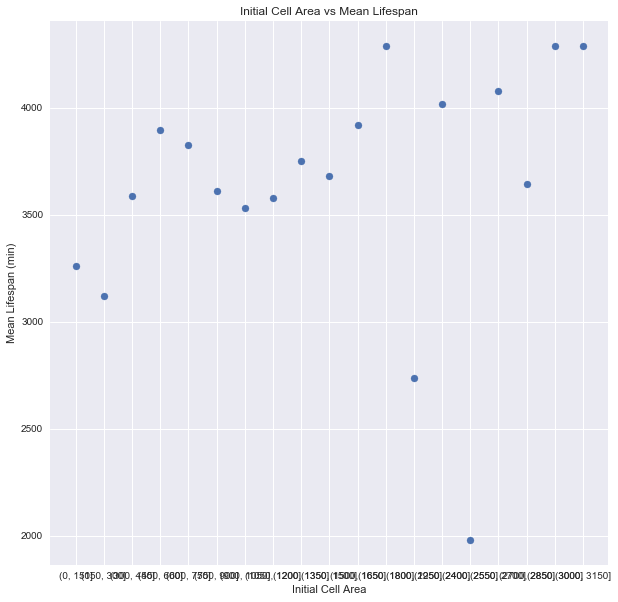

In [10]:

plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(0, 3500, 19), mean_init_data56.lifespan)
plt.xticks(np.linspace(0, 3500, 19), mean_init_data56.index)
#plt.ylim(ymin=0)
plt.xlabel('Initial Cell Area')
plt.ylabel('Mean Lifespan (min)')
plt.title('Initial Cell Area vs Mean Lifespan')


Text(0.5,1,'Initial Cell Area vs. Lifespan')

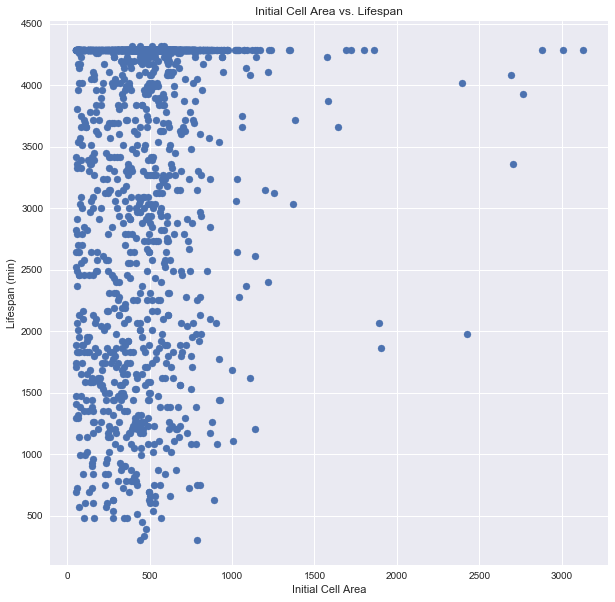

In [138]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plt.scatter(init_data56['init_area'], init_data56['lifespan'])
plt.xlabel('Initial Cell Area')
plt.ylabel('Lifespan (min)')
plt.title('Initial Cell Area vs. Lifespan')


In [232]:
median_data = init_data.groupby(pd.cut(init_data['init_area'], np.arange(0, 3200, 150)))['init_area', 'lifespan', 'final_area']
median_data.median()

,init_area,lifespan,final_area
init_area,,,
"(0, 150]",95.0,3480.0,277.0
"(150, 300]",234.0,2460.0,335.0
"(300, 450]",379.0,4260.0,608.0
"(450, 600]",521.0,4260.0,872.0
"(600, 750]",655.0,4260.0,912.0
"(750, 900]",787.5,4260.0,757.5
"(900, 1050]",944.5,4260.0,1339.0
"(1050, 1200]",1137.5,3705.0,1781.0
"(1200, 1350]",NaN,NaN,NaN


# Exp 92

In [11]:
gen_info92 = pd.read_table('LifeSpanCellFeatures/exp92_changhui.txt', sep='\t')
gen_info92.sort_values(by=['pos', 'label', 'time'], ascending=True, inplace=True)

gen_info92['state_int'] = 0
gen_info92['state_int'][gen_info92['state']=='S'] = 1
gen_info92.drop(['x', 'y', 'auto_type', 'final_state', 'is_fresh'], axis=1, inplace=True)
gen_info92['gen'] = gen_info92.groupby(by=['pos', 'label']).state_int.cumsum() + 1
gen_info92['id'] = 'P' + gen_info92['pos'].astype(str) + 'L' + gen_info92['label'].astype(str)
gen_info92['min'] = 30 * gen_info92['time']

gen_info92['area_change'] = gen_info92.groupby(by=['pos', 'label'])['area'].apply(lambda x: x.div(x.iloc[0])).multiply(100)
mean_data92 = gen_info92.groupby(by='gen')['area_change'].mean().reset_index()
data_vals92 = gen_info92.pivot_table(index = 'id', columns = 'gen', values = 'area_change')
std_vals92 = data_vals92.std(axis=0)
std_vals92.reset_index(drop=True, inplace=True)

lifespans92 = gen_info92.groupby(by=['pos', 'label'])['min'].max().reset_index().sort_values(by=['min'], ascending=False)
lifespans92.rename(columns={'min':'lifespan'}, inplace=True)
#lifespans92

(1, 35)

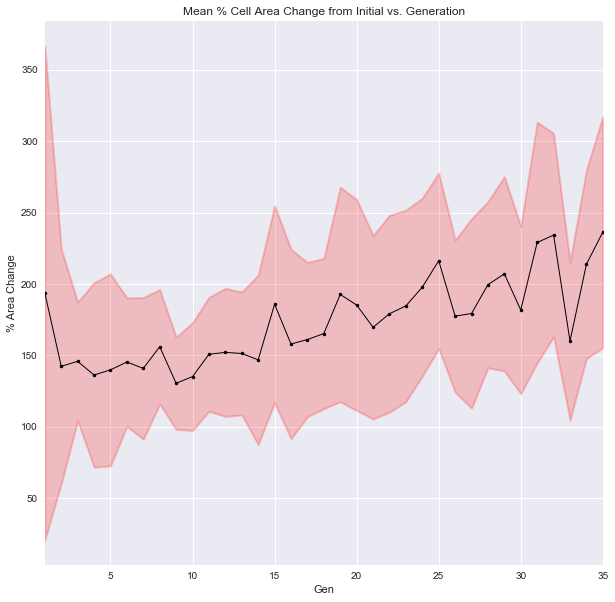

In [230]:
plt.figure(figsize=(10, 10))
plt.title('Mean % Cell Area Change from Initial vs. Generation')
plt.xlabel('Gen')
plt.ylabel('% Area Change')
plt.plot(mean_data92['gen'], mean_data92['area_change'], marker='.', linewidth=1, color='black')
plt.fill_between(mean_data92['gen'], mean_data92['area_change'] + std_vals92, mean_data92['area_change'] - std_vals92, color='red', linewidth = 2, alpha=.2)

plt.grid(True)

plt.xlim(xmin=1, xmax=35)


(0, 34.5)

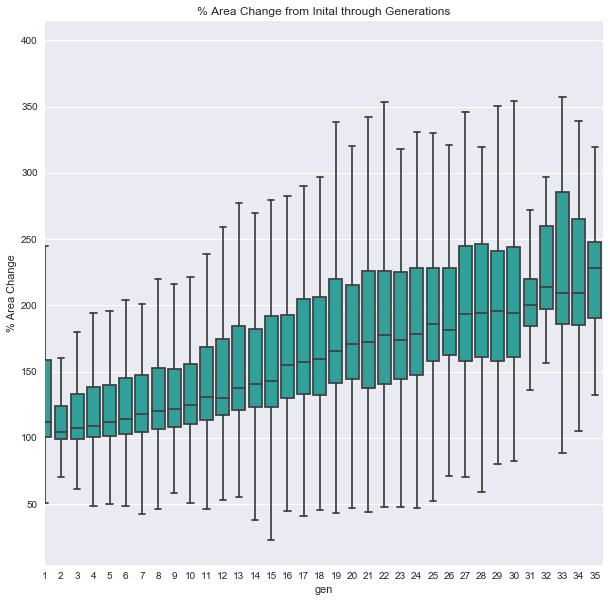

In [231]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=data_vals, color='lightseagreen', showfliers=False)
ax.set_title('% Area Change from Inital through Generations')
ax.set_ylabel('% Area Change')
ax.set_xlim(0, 34.5)

## Long-lived cells

In [70]:
long_lived92 = lifespans92[lifespans92['lifespan'] >= 4000]
#long_lived92

(0, 1348.4177060338484)

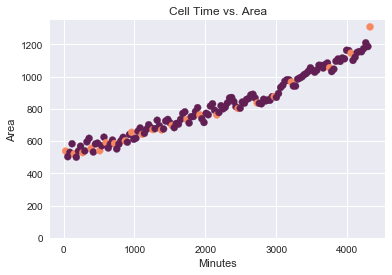

In [234]:
index = (gen_info92['pos']==1600) & (gen_info92['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 4028.6677060338484)

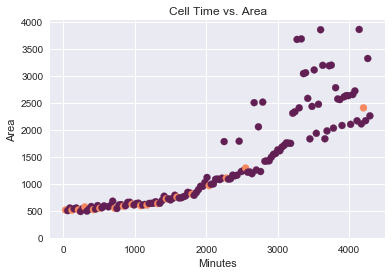

In [235]:
index = (gen_info92['pos']==2195) & (gen_info92['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1500)

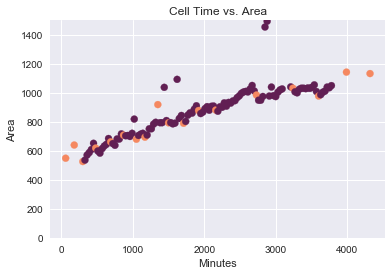

In [236]:
index = (gen_info92['pos']==105) & (gen_info92['label']==15)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0, ymax=1500)


(0, 3945.917706033848)

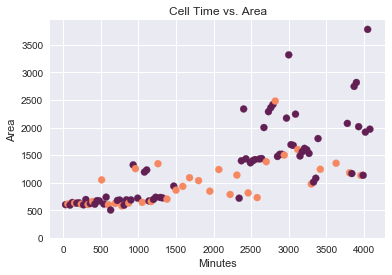

In [240]:
index = (gen_info92['pos']==232) & (gen_info92['label']==49)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1934.9677060338483)

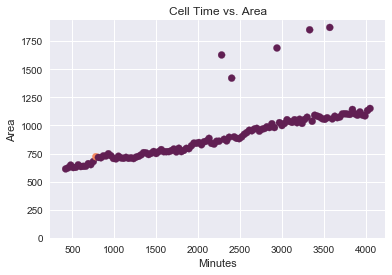

In [238]:
index = (gen_info92['pos']==413) & (gen_info92['label']==4)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1837.8677060338484)

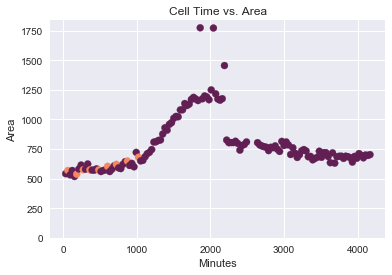

In [239]:
index = (gen_info92['pos']==62) & (gen_info92['label']==11)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info92[index]['min'], gen_info92[index]['area'], marker='o', c=gen_info92[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


## Comparing area growth between long-lived and short-lived cells

Text(0.5,1,'Median Area over Time')

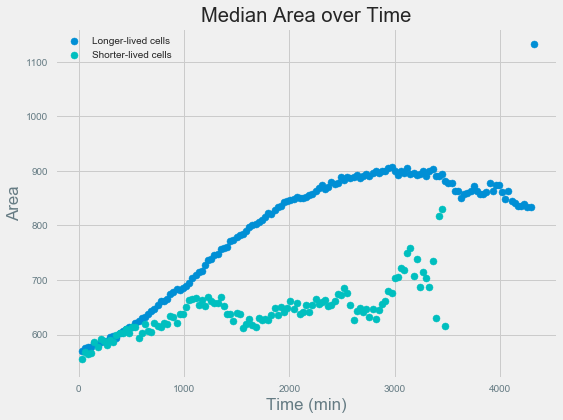

In [113]:
lifespans92_long = gen_info92.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() >= 3500)
med_lifespans92_long = lifespans92_long.groupby(by='min')['area'].median().reset_index()

lifespans92_short = gen_info92.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() < 3500)
med_lifespans92_short = lifespans92_short.groupby(by='min')['area'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(med_lifespans92_long['min'], med_lifespans92_long['area'], marker='o', label='Longer-lived cells')
plt.scatter(med_lifespans92_short['min'], med_lifespans92_short['area'], marker='o', c='c', label='Shorter-lived cells')
plt.xlabel('Time (min)')
plt.ylabel('Area')
plt.legend(loc = 'upper left')
plt.title('Median Area over Time')

## When Most Divisions Occur vs. Lifespan

In [66]:
total_gens92 = gen_info92.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
total_gens92.rename(columns={'state_int':'gens'}, inplace=True)

first_half_gens92 = gen_info92.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] <= x['min'].max()/2])
first_half_gens92.drop(['pos', 'label'], axis=1, inplace=True)
first_half_gens92.reset_index(inplace=True)
first_half_gens92 = first_half_gens92.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
first_half_gens92 = first_half_gens92.rename(columns={'state_int':'first_half_gens92'})
first_half_gens92 = pd.merge(first_half_gens92, total_gens92, on=['pos', 'label'], how='outer')
first_half_gens92['first half/total'] = first_half_gens92['first_half_gens92'] / first_half_gens92['gens']
first_half_gens92 = pd.merge(first_half_gens92, lifespans92, on=['pos', 'label'], how='outer')
first_half_gens92 = first_half_gens92.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

final_area_change92 = gen_info92.groupby(by=['pos', 'label'])['area_change'].last().reset_index()

Text(0,0.5,'Final Area of Cell')

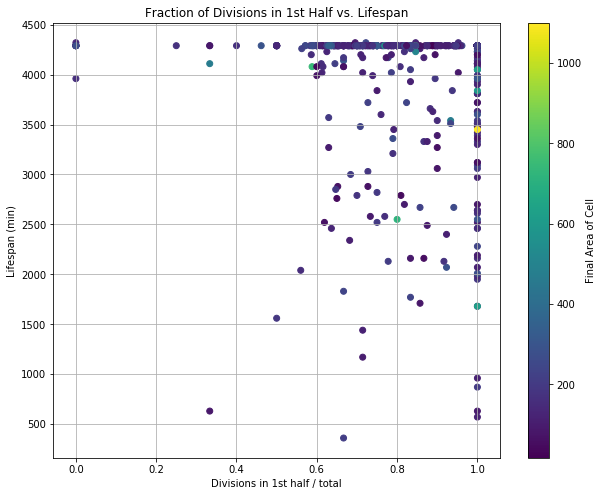

In [67]:
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=final_area_change['area_change'].min(), vmax=1100)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.scatter(first_half_gens92['first half/total'], first_half_gens92['lifespan'], c=cmap(norm(final_area_change92['area_change'].values)))
plt.xlabel('Divisions in 1st half / total')
plt.ylabel('Lifespan (min)')
plt.title('Fraction of Divisions in 1st Half vs. Lifespan')
plt.grid(True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Final Area of Cell', rotation=90)


## Initial Cell Size vs Lifespan

In [12]:
init_data92 = gen_info92.groupby(by=['pos', 'label']).first()
init_data92.reset_index(inplace=True)

init_data92 = pd.merge(init_data92, lifespans92, on=['pos', 'label'], how='outer')
init_data92.rename(columns={'area':'init_area'}, inplace=True)
init_data92['final_area'] = gen_info92.groupby(by=['pos', 'label'])['area'].last().reset_index()['area']

mean_init_data92 = init_data92.groupby(pd.cut(init_data92['init_area'], np.arange(0, 3500, 100)))['init_area', 'lifespan', 'final_area'].mean()
mean_init_data92.dropna(axis=0, inplace=True)
len(mean_init_data92)

17

Text(0.5,1,'Initial Cell Area vs Mean Lifespan')

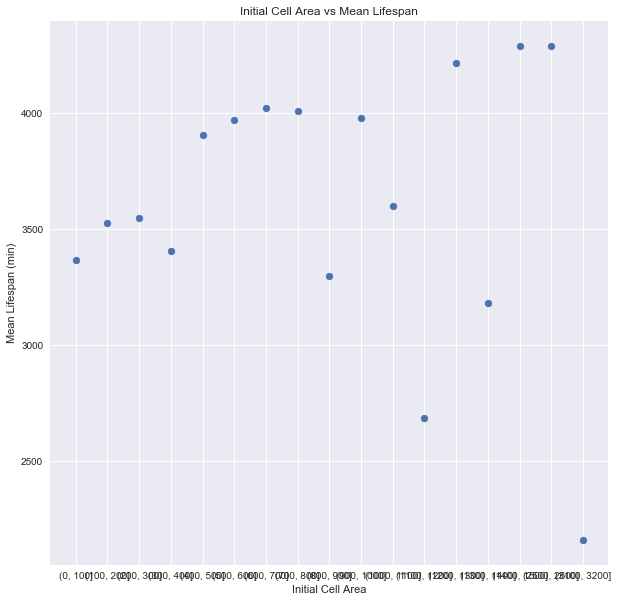

In [13]:

plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(0, 3500, 17), mean_init_data92.lifespan)
plt.xticks(np.linspace(0, 3500, 17), mean_init_data92.index)
#plt.ylim(ymin=0)
plt.xlabel('Initial Cell Area')
plt.ylabel('Mean Lifespan (min)')
plt.title('Initial Cell Area vs Mean Lifespan')


# Exp 95

In [14]:
gen_info95 = pd.read_table('LifeSpanCellFeatures/exp95_changhui.txt', sep='\t')
gen_info95.sort_values(by=['pos', 'label', 'time'], ascending=True, inplace=True)

gen_info95['state_int'] = 0
gen_info95['state_int'][gen_info95['state']=='S'] = 1
gen_info95.drop(['x', 'y', 'auto_type', 'final_state', 'is_fresh'], axis=1, inplace=True)
gen_info95['gen'] = gen_info95.groupby(by=['pos', 'label']).state_int.cumsum() + 1
gen_info95['id'] = 'P' + gen_info95['pos'].astype(str) + 'L' + gen_info95['label'].astype(str)
gen_info95['min'] = 30 * gen_info95['time']

gen_info95['area_change'] = gen_info95.groupby(by=['pos', 'label'])['area'].apply(lambda x: x.div(x.iloc[0])).multiply(100)
mean_data95 = gen_info95.groupby(by='gen')['area_change'].mean().reset_index()
data_vals95 = gen_info95.pivot_table(index = 'id', columns = 'gen', values = 'area_change')
std_vals95 = data_vals95.std(axis=0)
std_vals95.reset_index(drop=True, inplace=True)

lifespans95 = gen_info95.groupby(by=['pos', 'label'])['min'].max().reset_index().sort_values(by=['min'], ascending=False)
lifespans95.rename(columns={'min':'lifespan'}, inplace=True)
#lifespans95

(1, 38)

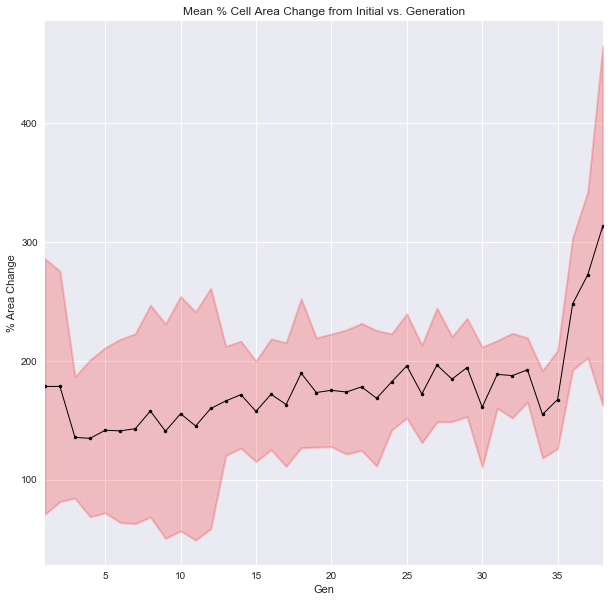

In [255]:
plt.figure(figsize=(10, 10))
plt.title('Mean % Cell Area Change from Initial vs. Generation')
plt.xlabel('Gen')
plt.ylabel('% Area Change')
plt.plot(mean_data95['gen'], mean_data95['area_change'], marker='.', linewidth=1, color='black')
plt.fill_between(mean_data95['gen'], mean_data95['area_change'] + std_vals95, mean_data95['area_change'] - std_vals95, color='red', linewidth = 2, alpha=.2)

plt.grid(True)

plt.xlim(xmin=1, xmax=38)


(0, 37.5)

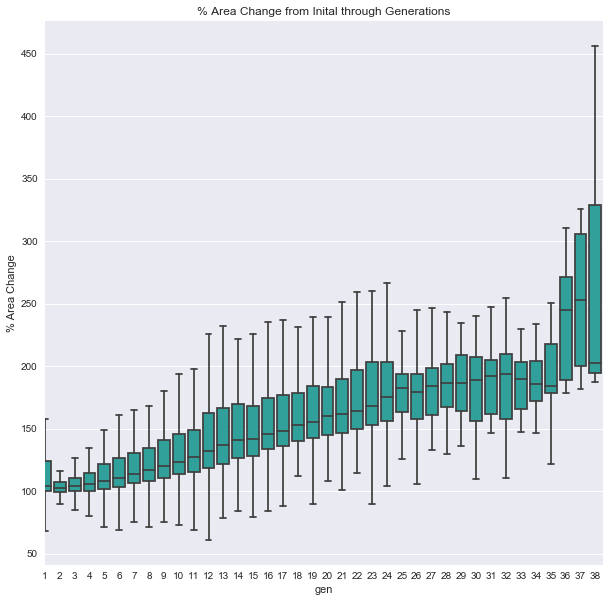

In [244]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=data_vals95, color='lightseagreen', showfliers=False)
ax.set_title('% Area Change from Inital through Generations')
ax.set_ylabel('% Area Change')
ax.set_xlim(0, 37.5)

## Long-lived cells

In [69]:
long_lived95 = lifespans95[lifespans95['lifespan'] >= 4000]
#long_lived95

(0, 777.0677060338485)

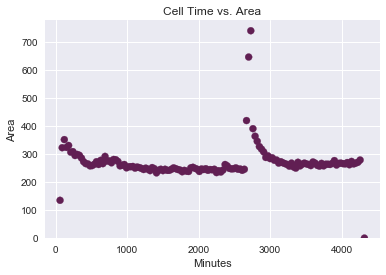

In [247]:
index = (gen_info95['pos']==2300) & (gen_info95['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 2374.6677060338484)

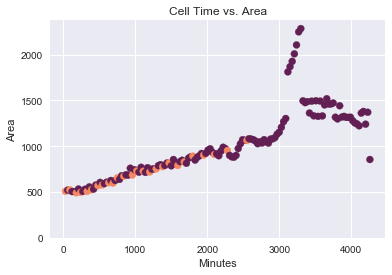

In [248]:
index = (gen_info95['pos']==495) & (gen_info95['label']==2)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 1500)

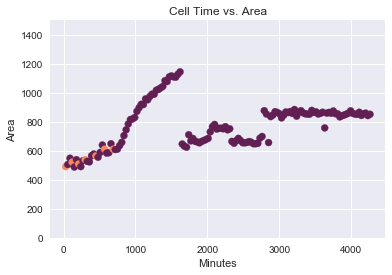

In [249]:
index = (gen_info95['pos']==700) & (gen_info95['label']==2)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0, ymax=1500)


(0, 5061.817706033847)

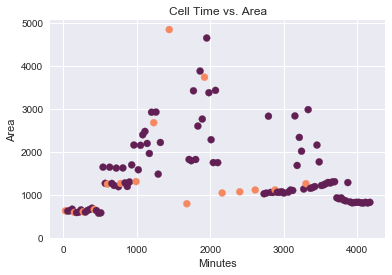

In [250]:
index = (gen_info95['pos']==2405) & (gen_info95['label']==11)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 2195.2177060338486)

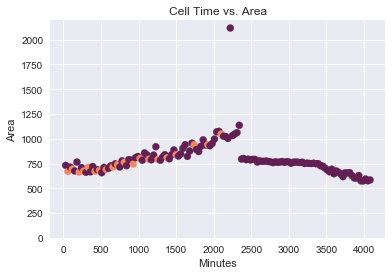

In [251]:
index = (gen_info95['pos']==3047) & (gen_info95['label']==5)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 930.3177060338484)

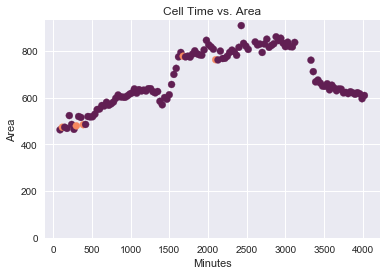

In [252]:
index = (gen_info95['pos']==1211) & (gen_info95['label']==4)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(gen_info95[index]['min'], gen_info95[index]['area'], marker='o', c=gen_info95[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


## Comparing area growth between long-lived and short-lived cells

Text(0.5,1,'Median Area over Time')

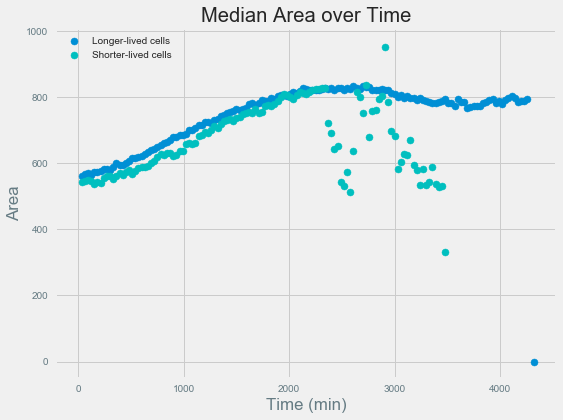

In [93]:
lifespans95_long = gen_info95.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() >= 3500)
med_lifespans95_long = lifespans95_long.groupby(by='min')['area'].median().reset_index()

lifespans95_short = gen_info95.groupby(by=['pos', 'label']).filter(lambda x: x['min'].max() < 3500)
med_lifespans95_short = lifespans95_short.groupby(by='min')['area'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(med_lifespans95_long['min'], med_lifespans95_long['area'], marker='o', label='Longer-lived cells')
plt.scatter(med_lifespans95_short['min'], med_lifespans95_short['area'], marker='o', c='c', label='Shorter-lived cells')
plt.xlabel('Time (min)')
plt.ylabel('Area')
plt.legend(loc = 'upper left')
plt.title('Median Area over Time')

## When Most Divisions Occur vs. Lifespan

In [62]:
total_gens95 = gen_info95.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
total_gens95.rename(columns={'state_int':'gens'}, inplace=True)

first_half_gens95 = gen_info95.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] <= x['min'].max()/2])
first_half_gens95.drop(['pos', 'label'], axis=1, inplace=True)
first_half_gens95.reset_index(inplace=True)
first_half_gens95 = first_half_gens95.groupby(by=['pos', 'label'])['state_int'].sum().reset_index()
first_half_gens95 = first_half_gens95.rename(columns={'state_int':'first_half_gens95'})
first_half_gens95 = pd.merge(first_half_gens95, total_gens95, on=['pos', 'label'], how='outer')
first_half_gens95['first half/total'] = first_half_gens95['first_half_gens95'] / first_half_gens95['gens']
first_half_gens95 = pd.merge(first_half_gens95, lifespans95, on=['pos', 'label'], how='outer')
first_half_gens95 = first_half_gens95.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

final_area_change95 = gen_info95.groupby(by=['pos', 'label'])['area_change'].last().reset_index()

Text(0,0.5,'Final Area of Cell')

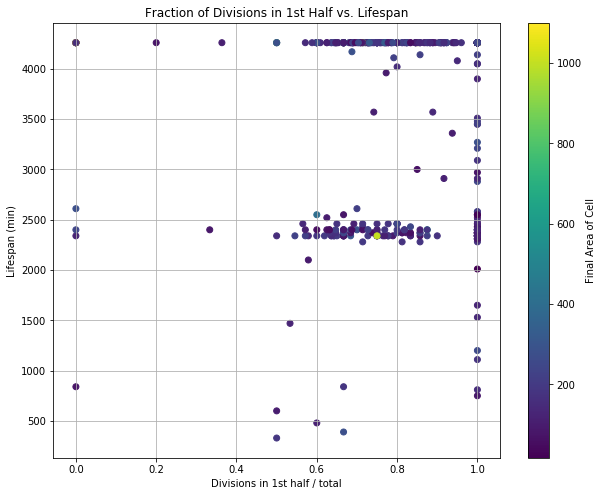

In [63]:
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=final_area_change['area_change'].min(), vmax=1100)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.scatter(first_half_gens95['first half/total'], first_half_gens95['lifespan'], c=cmap(norm(final_area_change95['area_change'].values)))
plt.xlabel('Divisions in 1st half / total')
plt.ylabel('Lifespan (min)')
plt.title('Fraction of Divisions in 1st Half vs. Lifespan')
plt.grid(True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Final Area of Cell', rotation=90)


## Initial cell size vs. Lifespan

In [16]:
init_data95 = gen_info95.groupby(by=['pos', 'label']).first()
init_data95.reset_index(inplace=True)

init_data95 = pd.merge(init_data95, lifespans95, on=['pos', 'label'], how='outer')
init_data95.rename(columns={'area':'init_area'}, inplace=True)
init_data95['final_area'] = gen_info95.groupby(by=['pos', 'label'])['area'].last().reset_index()['area']

mean_init_data95 = init_data95.groupby(pd.cut(init_data95['init_area'], np.arange(0, 2500, 50)))['init_area', 'lifespan', 'final_area'].mean()
mean_init_data95.dropna(axis=0, inplace=True)
len(mean_init_data95)

24

Text(0.5,1,'Initial Cell Area vs Mean Lifespan')

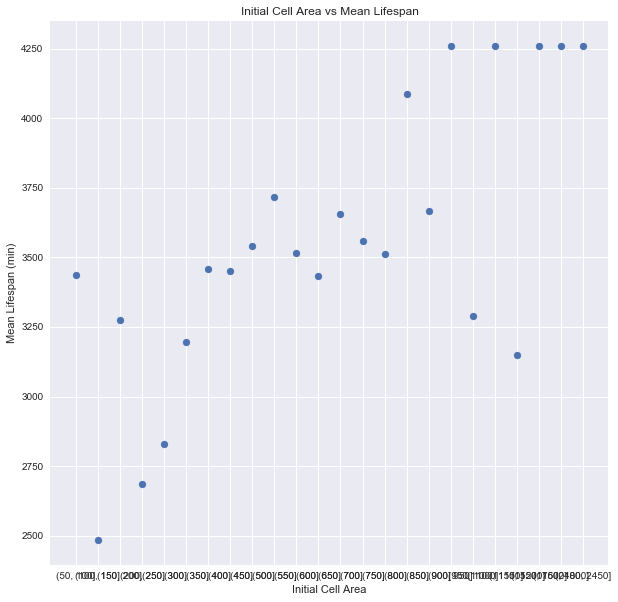

In [17]:

plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(0, 2500, 24), mean_init_data95.lifespan)
plt.xticks(np.linspace(0, 2500, 24), mean_init_data95.index)
#plt.ylim(ymin=0)
plt.xlabel('Initial Cell Area')
plt.ylabel('Mean Lifespan (min)')
plt.title('Initial Cell Area vs Mean Lifespan')
 

Text(0.5,1,'Initial Cell Area vs. Lifespan')

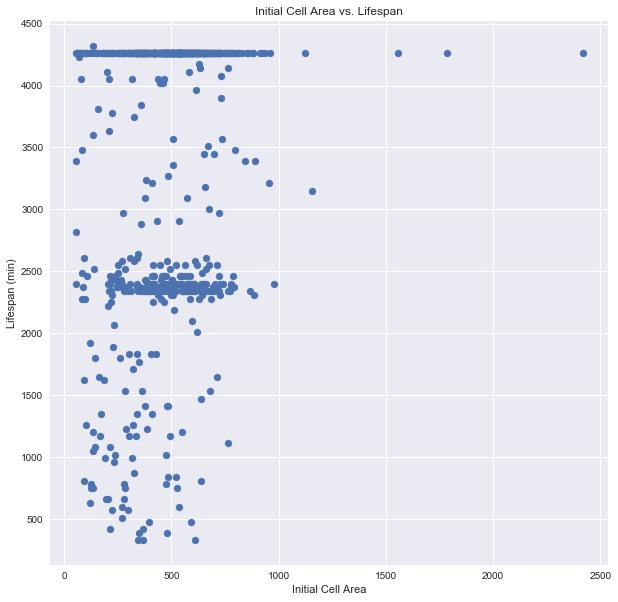

In [223]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plt.scatter(init_data95['init_area'], init_data95['lifespan'])
plt.xlabel('Initial Cell Area')
plt.ylabel('Lifespan (min)')
plt.title('Initial Cell Area vs. Lifespan')


## Number of cells in each dataset

In [93]:
len(gen_info49.groupby(by=['pos', 'label']))

723

In [94]:
len(gen_info56.groupby(by=['pos', 'label']))

2099

In [95]:
len(gen_info92.groupby(by=['pos', 'label']))

855

In [96]:
len(gen_info95.groupby(by=['pos', 'label']))

767

## Initial Cell Area vs. Lifespan (all experiments)

Text(-3,900,'Note: the data have been split into groups by initial cell area of equal ranges (dependent on experiment) and then averaged')

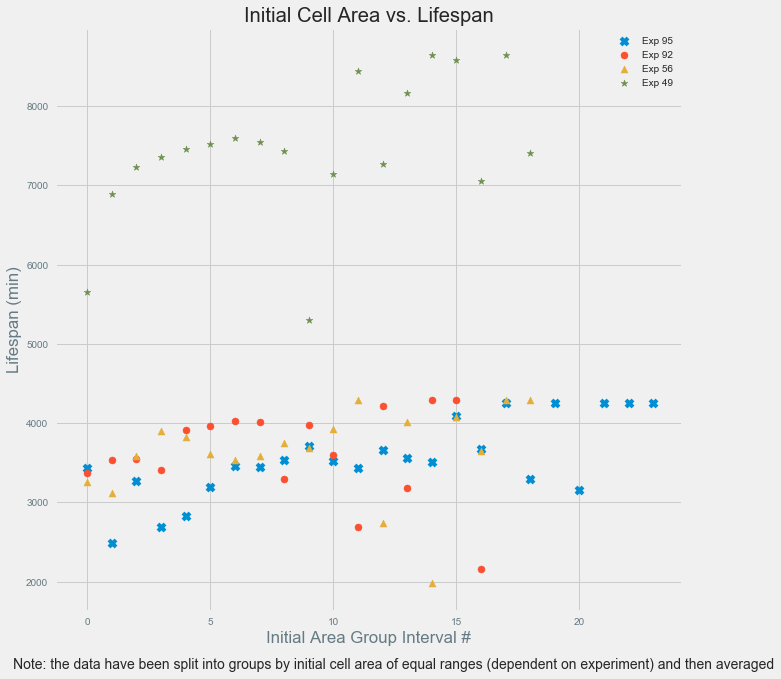

In [110]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

#ax1.scatter(np.linspace(0, 2500, 24), mean_init_data95.lifespan, c='b')
#ax1.scatter(np.linspace(0, 3500, 17), mean_init_data92.lifespan, c='r')
#ax1.scatter(np.linspace(0, 3500, 19), mean_init_data56.lifespan, c='g')
#ax1.scatter(np.linspace(0, 3500, 19), mean_init_data49.lifespan, c='y')

ax1.scatter(range(0, 24), mean_init_data95.lifespan, marker = 'x', label = 'Exp 95')
ax1.scatter(range(0, 17), mean_init_data92.lifespan, marker = 'o', label = 'Exp 92')
ax1.scatter(range(0, 19), mean_init_data56.lifespan, marker = '^', label = 'Exp 56')
ax1.scatter(range(0, 19), mean_init_data49.lifespan, marker = '*', label = 'Exp 49')

plt.legend(loc='upper right')
plt.xlabel('Initial Area Group Interval #')
plt.ylabel('Lifespan (min)')
plt.title('Initial Cell Area vs. Lifespan')
plt.text(-3, 900, 'Note: the data have been split into groups by initial cell area of equal ranges (dependent on experiment) and then averaged')
